In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Use the venn2 function
df = pd.read_csv('qryRelase3_20230919_ForWeb.csv', encoding_errors='ignore')
SDA = pd.read_csv('Suffolk County DA LEAD database - 9.25.20 - LEAD Entries.csv')
Complaint = pd.read_excel('Boston_Police_Active_Officers_Final_List_5.24.22_JBD_05.27.22_Final_.xlsx')
salary = pd.read_csv("Highest Salary1")
x = df
#SDA = SDA[SDA["AGENCY"] == "BPD"]
#x.head()
#Complaint.head()
#Complaint.head(20)
#salary.head()
#SDA.head()
salary["name"] = salary["name"].apply(lambda x: x.lower())
SDA["NAME"] = SDA["NAME"].apply(lambda x: x.lower())
Complaint["HCM name"] = Complaint["HCM name"].apply(lambda x: x.lower())
x["Name"] = x["LastName"] + "," + x["FirstName"]
x["Name"] = x["Name"].apply(lambda x: x.lower())

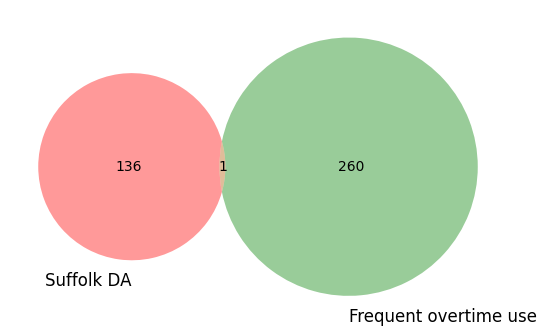

In [7]:
SDA["NAME"] = SDA["NAME"].apply(lambda x: x.split(",")[0] + "," + x.split(",")[1][1:])
Overtime = pd.read_csv("frequent overtime users1.csv")
o = Overtime.nlargest(260, columns="overtime_count")
o["Employee"] = o["Employee"].apply(lambda x: x.lower())
#SDA.head()
sum(SDA.NAME.isin(o.Employee).astype(int))
venn2(subsets = (len(SDA), len(o), sum(SDA.NAME.isin(o.Employee).astype(int))), set_labels = ('Suffolk DA', 'Frequent overtime use'))

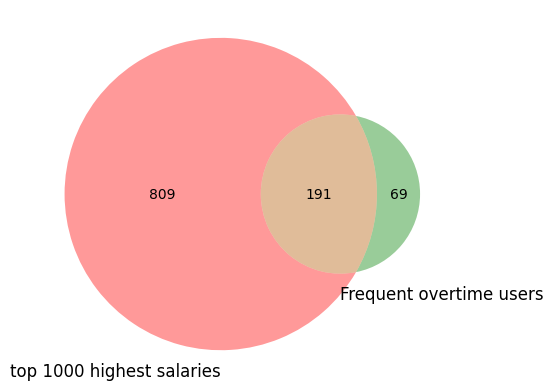

In [108]:
s = sum(salary.name.isin(o.Employee).astype(int))
venn2(subsets = (len(salary) - s, len(o) - s, sum(salary.name.isin(o.Employee).astype(int))), set_labels = ('top 1000 highest salaries', 'Frequent overtime users'))
#plt.show()

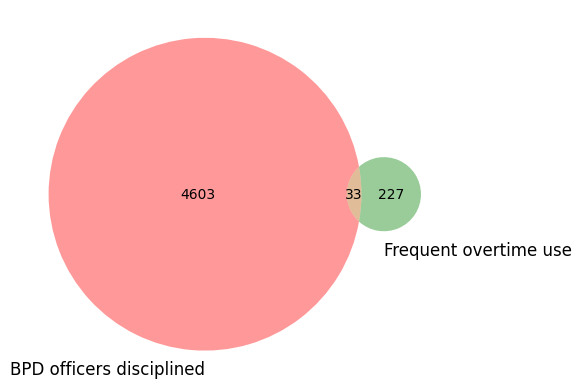

In [109]:
s = sum(x.Name.isin(o.Employee).astype(int))
venn2(subsets = (len(x) - s, len(o) - s, s), set_labels = ('BPD officers disciplined', 'Frequent overtime use'))
plt.show()

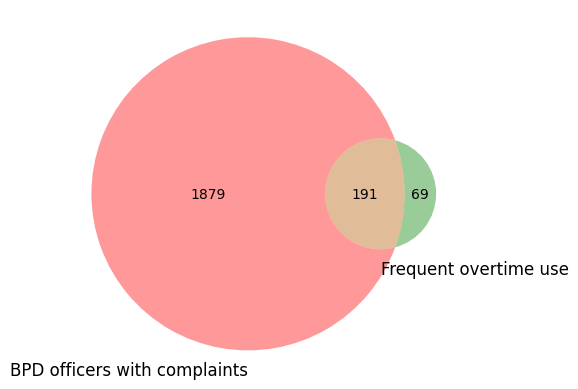

In [112]:
#Complaint.head()
#Complaint.columns
s = sum(Complaint.groupby("Employee_ID_HCM").first().reset_index()["Employee_ID_HCM"].isin(o.Emp_ID).astype(int))
venn2(subsets = (len(Complaint.groupby("Employee_ID_HCM").first().reset_index()) - s, len(o) - s, s), set_labels = ('BPD officers with complaints', 'Frequent overtime use'))
plt.show()

In [8]:
SDA[SDA.NAME.isin(Complaint["HCM name"])]
#SDA.head()
x[x["Name"] == "hosein,haseeb"]

,POST Number,IA Number,Incident Date,MPTCUserID,LastName,FirstName,Certification Status,Agency,Reporting Agency,Criminal Chg,Criminal Level,Misconduct Type,Misconduct Subtype,Misconduct Details,Allegation Disposition,Discipline,NotAdministered Reason,Name
2287,1026,138-06,6/28/2006,9995-6341,Hosein,Haseeb,Certified,Boston Police Department,Boston Police Department,NaN,NaN,Truthfulness or Professional Integrity,Submitting false timesheets,Authorized Details (16 counts),Sustained,"Suspension, 30+ days",DISCIPLINE WAS HELD IN ABEYANCE,"hosein,haseeb"
2288,1026,138-06,6/28/2006,9995-6341,Hosein,Haseeb,Certified,Boston Police Department,Boston Police Department,NaN,NaN,Truthfulness or Professional Integrity,Other form of untruthfulness,Untruthfulness,Sustained,NaN,NaN,"hosein,haseeb"
2289,1026,138-06,6/28/2006,9995-6341,Hosein,Haseeb,Certified,Boston Police Department,Boston Police Department,NaN,NaN,Other Misconduct,Other / conduct unbecoming,Conduct Unbecoming,Sustained,NaN,NaN,"hosein,haseeb"
2290,1026,138-06,6/28/2006,9995-6341,Hosein,Haseeb,Certified,Boston Police Department,Boston Police Department,NaN,NaN,Truthfulness or Professional Integrity,Other form of untruthfulness,Acceptance of Details (24 counts),Sustained,NaN,NaN,"hosein,haseeb"
2291,1026,138-06,6/28/2006,9995-6341,Hosein,Haseeb,Certified,Boston Police Department,Boston Police Department,NaN,NaN,Truthfulness or Professional Integrity,Other form of untruthfulness,Conformance to Laws,Sustained,NaN,NaN,"hosein,haseeb"
2292,1026,138-06,6/28/2006,9995-6341,Hosein,Haseeb,Certified,Boston Police Department,Boston Police Department,NaN,NaN,Truthfulness or Professional Integrity,Submitting false timesheets,Detail Cards (80 counts),Sustained,NaN,NaN,"hosein,haseeb"
2293,1027,20403,9/3/2003,9995-6341,Hosein,Haseeb,Certified,Boston Police Department,Boston Police Department,NaN,NaN,Other Misconduct,Improper firearm usage or storage,Securing and Maintenance of Firearm,Sustained,"Suspension, 1-5 days",NaN,"hosein,haseeb"
2294,1027,20403,9/3/2003,9995-6341,Hosein,Haseeb,Certified,Boston Police Department,Boston Police Department,NaN,NaN,Other Misconduct,Improper firearm usage or storage,Warning Shots and Signals,Sustained,NaN,NaN,"hosein,haseeb"


In [11]:
o[o["Employee"] == "hosein,haseeb"]
salary.head(1000)

,name,department,title,regular,retro,other,overtime,injured,detail,quinn,total earnings,zip code,year,zip,quinn/education incentive,postal,quinn / education incentive,quinn_education_incentive,quinn_education
0,"beckers,richard",Boston Police Department,Police Officer,NaN,NaN,1264843.63,NaN,NaN,NaN,NaN,1264843.63,NaN,2021,NaN,NaN,2119.0,NaN,NaN,NaN
1,"mcgowan,jacqueline m.",Boston Police Department,Police Officer,NaN,NaN,1252990.81,NaN,NaN,NaN,NaN,1252990.81,NaN,2021,NaN,NaN,2129.0,NaN,NaN,NaN
2,"jones,ronnie c",Boston Police Department,Police Officer,462149.98,NaN,114973.46,NaN,NaN,NaN,NaN,577123.44,NaN,2018,NaN,-,2126.0,NaN,NaN,NaN
3,"hosein,haseeb",Boston Police Department,Police Lieutenant,104338.90,0.0,13527.73,39027.83,0.00,88405.0,$14614.58,259914.04,02119-2109,2011,02186-5215,$26506.58,2186.0,"$41,681.12",41125.37,40143.50
4,"eversley,eric v",Boston Police Department,Police Lieutenant (Det),106564.00,0.0,15458.58,43905.11,0.00,73236.0,$11947.57,251111.26,01702-7250,2011,01702-7250,$18685.84,1702.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"johnson,keith",Boston Police Department,Police Officer,66287.52,0.0,800.00,6025.77,4142.97,42236.0,$0.00,119492.26,02119-1603,2011,02119-1603,$0.00,2119.0,NaN,NaN,NaN
996,"miskel,joseph m",Boston Police Department,Police Officer,69385.80,0.0,800.00,10980.53,0.00,30513.0,$7777.47,119456.80,02190-1662,2011,02190-1662,$12901.99,2190.0,"$19,282.99",18919.16,2910.64
997,"canuto,emanuel",Boston Police Department,Police Officer,68181.24,0.0,6181.82,29377.08,0.00,11861.0,$3819.75,119420.89,02119-3032,2011,02119-3032,$5875.06,2119.0,"$21,211.81",20928.98,25042.46
998,"nolan,edward joseph",Boston Police Department,Police Officer,72679.75,0.0,5075.28,2158.88,0.00,39409.0,$0.00,119322.91,02122-1909,2011,02122-1909,$0.00,2122.0,NaN,NaN,NaN
